#Part B: Non-Linear SVM

##Generate Data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

class SVM:
    def __init__(self, kernel='rbf', C=1.0, gamma=0.1):
        self.kernel = kernel
        self.C = C
        self.gamma = gamma
        self.w = None
        self.b = None
        self.alpha = None
        self.support_vectors = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.X = X
        self.y = y

        # Create Kernel matrix
        self.kernel_matrix = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                if self.kernel == 'rbf':
                    self.kernel_matrix[i, j] = self.rbf_kernel(X[i], X[j])
                else:
                    self.kernel_matrix[i, j] = np.dot(X[i], X[j])

        self.alpha = np.random.rand(n_samples)
        self.b = 0
        # Training loop (simplified)
        for _ in range(100):
            for i in range(n_samples):
                y_pred = np.dot(self.alpha * self.y, self.kernel_matrix[:, i]) + self.b
                if y[i] * y_pred <= 1:
                    self.alpha[i] += 0.01
                    self.b += 0.01 * y[i]


        self.support_vectors = np.where(self.alpha > 1e-5)[0]
        self.w = np.dot(self.alpha * self.y, X)

    def predict(self, X):
        y_pred = np.zeros(X.shape[0])
        for i in range(X.shape[0]):
            prediction = np.dot(self.alpha * self.y, self.rbf_kernel(self.X, X[i])) + self.b
            y_pred[i] = np.sign(prediction)
        return y_pred

    def rbf_kernel(self, x1, x2):
        if np.ndim(x1) == 1 and np.ndim(x2) == 1:
            return np.exp(-self.gamma * np.linalg.norm(x1 - x2)**2)
        else:
            return np.exp(-self.gamma * np.linalg.norm(x1 - x2, axis=1)**2)


X, y = make_circles(n_samples=1000, noise=0.1, factor=0.5, random_state=42)
y[y == 0] = -1


##Split data into training and testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Train SVM model

In [ ]:
svm = SVM(kernel='rbf')
svm.fit(X_train, y_train)

##Train SVM model

##Plot Decision Boundary

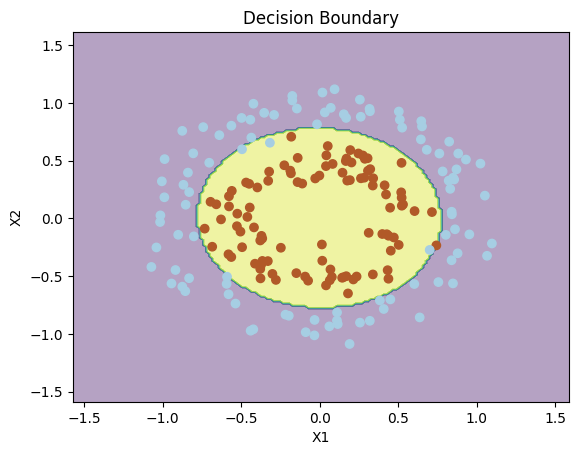

In [ ]:
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Decision Boundary')
    plt.show()

plot_decision_boundary(svm, X_test, y_test)

##Calculate accuracy

In [ ]:
y_pred = svm.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

Accuracy: 0.98


##Predict class for a random data point

In [ ]:
random_point = np.random.rand(1, 2) * 2 - 1
predicted_class = svm.predict(random_point)[0]
print("Predicted class for random point:", predicted_class)

Predicted class for random point: -1.0
